### Sample program for calculating accuracy measures and plotting ROC / PR curve

#### Import libraries  

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, matthews_corrcoef

#### Parameters  

In [2]:
csv_in = 'ai-end2-1.csv'

#### CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(107, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   107 non-null    float64
 1   A       107 non-null    float64
 2   B       107 non-null    float64
 3   C       107 non-null    float64
dtypes: float64(4)
memory usage: 3.5 KB
None


,label,A,B,C
0,1.0,0.288374,0.957809,0.643425
1,1.0,0.954157,0.861865,0.801566
2,1.0,0.605162,0.818588,0.871809
3,0.0,0.369670,0.090991,0.285757
4,0.0,0.951802,0.080485,0.634434


#### Confusing matrix (混同行列) and measurements for prediction accuracy for each method  

In [4]:
print('A')
print('precision:', precision_score(df['label'], df['A']>=0.4))
print('recall:', recall_score(df['label'], df['A']>=0.4))
print('accuracy(Q2):', accuracy_score(df['label'], df['A']>=0.4))
print('f1:', f1_score(df['label'], df['A']>=0.4))
print('matthews:', matthews_corrcoef(df['label'], df['A']>=0.4))
predA = df['A'].map(lambda x: 1 if x >= 0.4 else 0)
ctA = pd.crosstab(df['label'], predA)
fpA = ctA.loc[0,1]
tnA = ctA.loc[0,0]
print('false positive rate:', fpA/(fpA+tnA))
display(ctA)

A
precision: 0.6506024096385542
recall: 0.8571428571428571
accuracy(Q2): 0.6448598130841121
f1: 0.7397260273972602
matthews: 0.23363132092407182
false positive rate: 0.6590909090909091


A,0,1
label,,
0.0,15,29
1.0,9,54


In [5]:
print('B')
print('precision:', precision_score(df['label'], df['B']>=0.5))
print('recall:', recall_score(df['label'], df['B']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['B']>=0.5))
print('f1:', f1_score(df['label'], df['B']>=0.5))
print('matthews:', matthews_corrcoef(df['label'], df['B']>=0.5))
predB = df['B'].map(lambda x: 1 if x >= 0.5 else 0)
ctB = pd.crosstab(df['label'], predB)
fpB = ctB.loc[0,1]
tnB = ctB.loc[0,0]
print('false positive rate:', fpB/(fpB+tnB))

B
precision: 0.7887323943661971
recall: 0.8888888888888888
accuracy(Q2): 0.794392523364486
f1: 0.835820895522388
matthews: 0.5706643415703757
false positive rate: 0.3409090909090909


In [6]:
print('C')
print('precision:', precision_score(df['label'], df['C']>=0.5))
print('recall:', recall_score(df['label'], df['C']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['C']>=0.5))
print('f1:', f1_score(df['label'], df['C']>=0.5))
print('matthews:', matthews_corrcoef(df['label'], df['C']>=0.5))
predC = df['C'].map(lambda x: 1 if x >= 0.5 else 0)
ctC = pd.crosstab(df['label'], predC)
fpC = ctC.loc[0,1]
tnC = ctC.loc[0,0]
print('false positive rate:', fpC/(fpC+tnC))

C
precision: 0.7654320987654321
recall: 0.9841269841269841
accuracy(Q2): 0.8130841121495327
f1: 0.861111111111111
matthews: 0.6336499344868604
false positive rate: 0.4318181818181818


#### ROC curve and its AUC for each method  

In [7]:
y_true = df['label']
y_score = df['A']
fprA, tprA, thresholdsA = roc_curve(y_true, y_score)
print('AUC(A):', roc_auc_score(y_true, y_score))
#print('AUC(A):', auc(fprA, tprA))  # from fpr and tpr
y_score = df['B']
fprB, tprB, thresholdsB = roc_curve(y_true, y_score)
print('AUC(B):', roc_auc_score(y_true, y_score))
#print('AUC(B):', auc(fprB, tprB))  # from fpr and tpr
y_score = df['C']
fprC, tprC, thresholdsC = roc_curve(y_true, y_score)
print('AUC(C):', roc_auc_score(y_true, y_score))
#print('AUC(C):', auc(fprC, tprC)) # from fpr and tpr

AUC(A): 0.7316017316017315
AUC(B): 0.8993506493506493
AUC(C): 0.9448051948051949


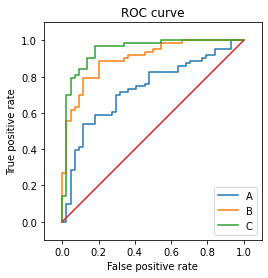

In [8]:
plt.plot(fprA, tprA, label='A')
plt.plot(fprB, tprB, label='B')
plt.plot(fprC, tprC, label='C')
plt.plot([0,1],[0,1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

#### PR curve and its AUC for each method  

In [9]:
y_true = df['label']
y_scoreA = df['A']
precisionA, recallA, thresholdsA = precision_recall_curve(y_true, y_scoreA)
print('PR-AUC(A):', auc(recallA, precisionA))
y_scoreB = df['B']
precisionB, recallB, thresholdsB = precision_recall_curve(y_true, y_scoreB)
print('PR-AUC(B):', auc(recallB, precisionB))
y_scoreC = df['C']
precisionC, recallC, thresholdsC = precision_recall_curve(y_true, y_scoreC)
print('PR-AUC(C):', auc(recallC, precisionC))

PR-AUC(A): 0.7677477812277398
PR-AUC(B): 0.9269752907477993
PR-AUC(C): 0.9477146692926077


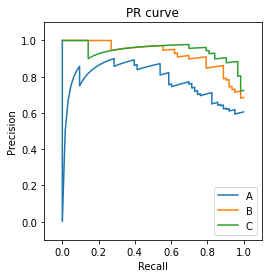

In [10]:
plt.plot(recallA, precisionA, label='A')
plt.plot(recallB, precisionB, label='B')
plt.plot(recallC, precisionC, label='C')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

#### (Accuracy around high score predictions to see the meaning of PR curves)  
accuracy: B > A > C (this corresponds to PR-AUC)  

In [11]:
display(df[['label','A']].sort_values(by='A', ascending=False).head())
display(df[['label','B']].sort_values(by='B', ascending=False).head())
display(df[['label','C']].sort_values(by='C', ascending=False).head())

,label,A
67,0.0,0.999833
69,1.0,0.999453
68,1.0,0.999295
46,1.0,0.999287
87,1.0,0.999185


,label,B
52,1.0,0.996397
75,1.0,0.977371
34,1.0,0.977251
11,1.0,0.977040
7,1.0,0.969373


,label,C
57,1.0,0.925846
49,1.0,0.920949
93,1.0,0.910696
95,1.0,0.904050
6,1.0,0.898555
